In [1]:
# 입력층, 출력층 각 1개 모델

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

print(tf.__version__)

2.4.1


In [2]:
# 원래 TrainingData, ValidationData, TestData 각각 만들어야하지만 간단한 모델이므로 TrainingData만 생성

x_data = np.array([[1,2,0],[5,4,3],[1,2,-1],[3,1,0],[2,4,2],
                  [4,1,2],[-1,3,2],[4,3,3],[0,2,6],[2,2,1],
                  [1,-2,-2],[0,1,3],[1,1,3],[0,1,4],[2,3,3]])
t_data = np.array([-4,4,-6,3,-4,
                   9,-7,5,6,0,
                   4,3,5,5,1])
print(x_data.shape, t_data.shape)

(15, 3) (15,)


In [4]:
model = Sequential()

model.add(Dense(1, input_shape=(3,), activation='linear'))

In [6]:
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x_data, t_data, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 426ms/step - loss: 23.7780
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 20.5381
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 18.4898
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 17.0554
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 15.9477
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 15.0235
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 14.2106
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 13.4719
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 12.7880
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 12.1481
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 11.5458
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 10.9771
Epoch 13/1000
1/1 [================

In [9]:
test_data = [ [5,5,0], [2,3,1], [-1,0,-1], [10,5,2], [4,-1,-2] ]     # 테스트값

ret_val = [ 2*data[0] -3*data[1] + 2*data[2] for data in test_data ]     # 실제 정답

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print("============================")
print(ret_val)

[[-4.999517 ]
 [-3.0001395]
 [-4.0012026]
 [ 9.001395 ]
 [ 6.999268 ]]
[-5, -3, -4, 9, 7]


In [10]:
print(model.weights)     # 가중치, 바이어스 확인

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.000143 ],
       [-2.9998543],
       [ 2.0000987]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00096097], dtype=float32)>]


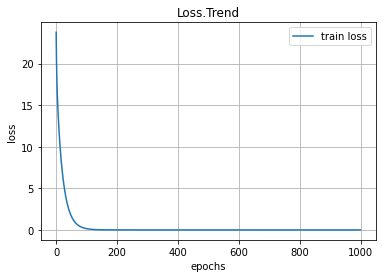

In [12]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss.Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()